# Lending Club Case Study

# Initial Steps

In [205]:
# Initialize library which to be used for analysis
import pandas as pd
import numpy as np

In [206]:
# Reading coma separted file usingn pandas library
raw_loan_data = pd.read_csv("loan.csv")
raw_loan_data.shape

C:\Users\priya\AppData\Local\Temp\ipykernel_13204\3640188012.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_loan_data = pd.read_csv("loan.csv")


(39717, 111)

# Data Cleaning

## Check if any duplicate 'id' is present

Ideally 'id' should be unique number for each row entry, hence below step is performed to check if we any duplicate 'id' is available

In [207]:
raw_loan_data[raw_loan_data['id'].duplicated(keep='first')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


As per above step, we do not found any 'id' is duplicate in record

## Select neccessory columns for analysis

In [208]:
loan_data = raw_loan_data.loc[:, ['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 'int_rate', 'installment', 'loan_status', 'grade', 'sub_grade', 'dti', 'verification_status', 'term', 'home_ownership', 'purpose', 'addr_state']]
loan_data.shape

(39717, 16)

In [209]:
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,int_rate,installment,loan_status,grade,sub_grade,dti,verification_status,term,home_ownership,purpose,addr_state
0,1077501,5000,5000,4975.0,24000.0,10.65%,162.87,Fully Paid,B,B2,27.65,Verified,36 months,RENT,credit_card,AZ
1,1077430,2500,2500,2500.0,30000.0,15.27%,59.83,Charged Off,C,C4,1.00,Source Verified,60 months,RENT,car,GA
2,1077175,2400,2400,2400.0,12252.0,15.96%,84.33,Fully Paid,C,C5,8.72,Not Verified,36 months,RENT,small_business,IL
3,1076863,10000,10000,10000.0,49200.0,13.49%,339.31,Fully Paid,C,C1,20.00,Source Verified,36 months,RENT,other,CA
4,1075358,3000,3000,3000.0,80000.0,12.69%,67.79,Current,B,B5,17.94,Source Verified,60 months,RENT,other,OR


## Filter Data
- Check if any column have null value
- Correct Datatype / Units

**Analysis:**

Data type is coming as expected for each column

## No multi datatype column detected
## No Unit conversion required for selected columns

In [210]:
loan_data.iloc[:, 0:100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   loan_amnt            39717 non-null  int64  
 2   funded_amnt          39717 non-null  int64  
 3   funded_amnt_inv      39717 non-null  float64
 4   annual_inc           39717 non-null  float64
 5   int_rate             39717 non-null  object 
 6   installment          39717 non-null  float64
 7   loan_status          39717 non-null  object 
 8   grade                39717 non-null  object 
 9   sub_grade            39717 non-null  object 
 10  dti                  39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  term                 39717 non-null  object 
 13  home_ownership       39717 non-null  object 
 14  purpose              39717 non-null  object 
 15  addr_state           39717 non-null 

In [211]:
loan_data.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,installment,dti
count,3.971700e+04,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000
mean,6.831319e+05,11219.443815,10947.713196,10397.448868,6.896893e+04,324.561922,13.315130
std,2.106941e+05,7456.670694,7187.238670,7128.450439,6.379377e+04,208.874874,6.678594
min,5.473400e+04,500.000000,500.000000,0.000000,4.000000e+03,15.690000,0.000000
25%,5.162210e+05,5500.000000,5400.000000,5000.000000,4.040400e+04,167.020000,8.170000
50%,6.656650e+05,10000.000000,9600.000000,8975.000000,5.900000e+04,280.220000,13.400000
75%,8.377550e+05,15000.000000,15000.000000,14400.000000,8.230000e+04,430.780000,18.600000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,6.000000e+06,1305.190000,29.990000


In [212]:
#loan_data.corr()

# Univariate Analysis:

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

## Customer count for each loan status

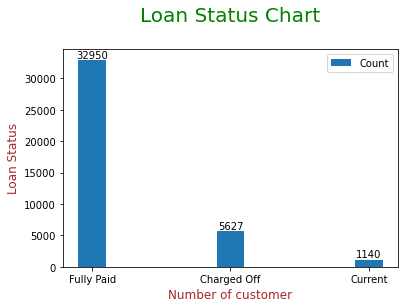

In [214]:
# take loan status variable vs occurance of the value
X = loan_data['loan_status'].value_counts().index.values
Y = loan_data['loan_status'].value_counts().values
chart1 = plt.bar(X, Y, label='Count', width=0.2)

# Adding and formatting title
plt.title("Loan Status Chart\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Number of customer", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

# Add count number for each bar candle
plt.bar_label(chart1, fmt='%d')

plt.legend()
plt.show()

## Purpose of loan bar graph

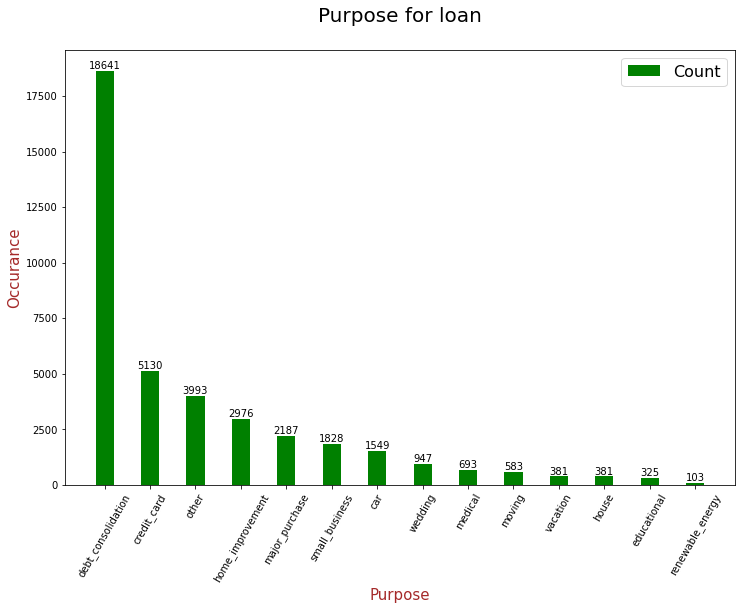

In [215]:
plt.figure(figsize=[12, 8])

# take purpose variable vs occurance of the value
X = loan_data['purpose'].value_counts().index.values
Y = loan_data['purpose'].value_counts().values
chart1 = plt.bar(X, Y, label='Count', width=0.4, color='Green')

# Adding and formatting title
plt.title("Purpose for loan\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})

# Labeling Axes
plt.xlabel("Purpose", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Occurance", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})

plt.xticks(rotation=60)

# Add count number for each bar candle
plt.bar_label(chart1, fmt='%d')

plt.legend(prop={"size":16})
plt.show()

## State wise Loan applications

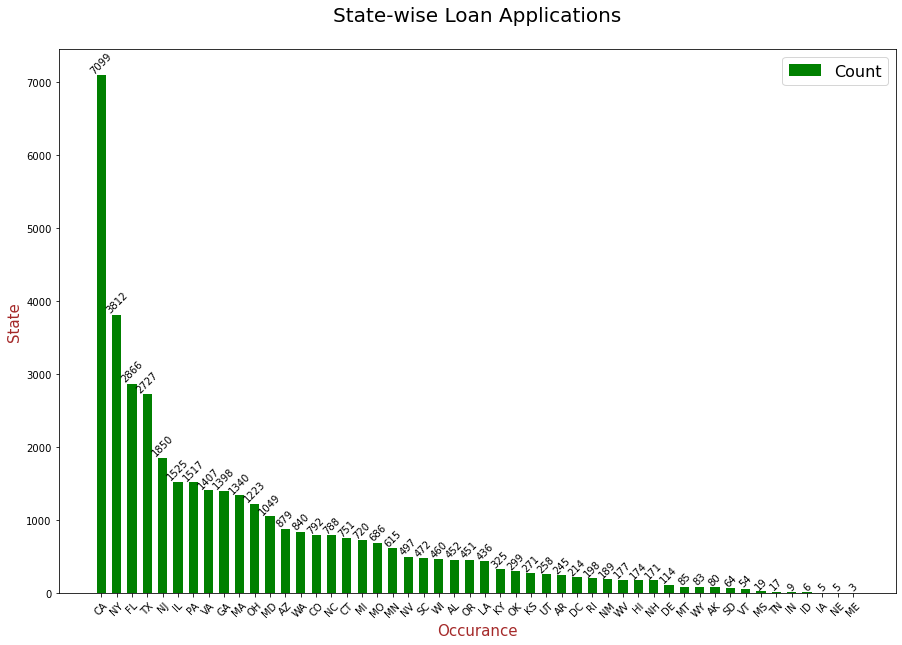

In [216]:
plt.figure(figsize=[15, 10])

# take state code variable vs occurance of the value
X = loan_data['addr_state'].value_counts().index.values
Y = loan_data['addr_state'].value_counts().values
chart1 = plt.bar(X, Y, label='Count', width=0.6, color='Green')

# Adding and formatting title
plt.title("State-wise Loan Applications\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})

# Labeling Axes
plt.xlabel("Occurance", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("State", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})

plt.xticks(rotation=45)

# Add count number for each bar candle
plt.bar_label(chart1, fmt='%d', rotation=45)

plt.legend(prop={"size":16})
plt.show()

## Customer Count for both Tenure of loan

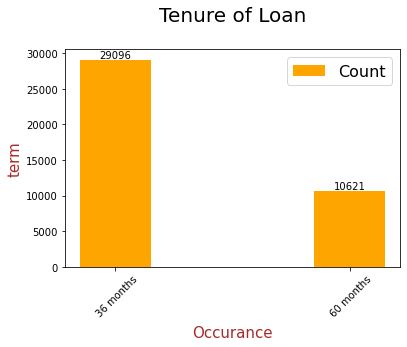

In [217]:
# take ter variable vs occurance of the value
X = loan_data['term'].value_counts().index.values
Y = loan_data['term'].value_counts().values
chart1 = plt.bar(X, Y, label='Count', width=0.3, color='Orange')

# Adding and formatting title
plt.title("Tenure of Loan\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})

# Labeling Axes
plt.xlabel("Occurance", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("term", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})

plt.xticks(rotation=45)

# Add count number for each bar candle
plt.bar_label(chart1, fmt='%d')

plt.legend(prop={"size":16})
plt.show()

## Borrower's Distribution with different dti

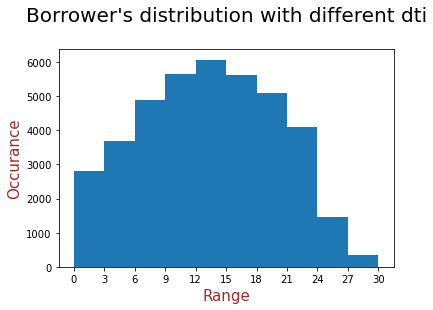

In [218]:
plt.hist(loan_data['dti'], bins=10)
plt.xticks(np.arange(0,31,3))

# Adding and formatting title
plt.title("Borrower's distribution with different dti\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})

# Labeling Axes
plt.xlabel("Range", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Occurance", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

# Bivariate Analysis:

##### The member whose loan is "Current" should be not analysed for this study,

##### Hence we should remove them as a "not required rows"

In [219]:
# Currently running loan status member removed from analysis data
loan_data = loan_data[loan_data["loan_status"] != 'Current']

In [220]:
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,int_rate,installment,loan_status,grade,sub_grade,dti,verification_status,term,home_ownership,purpose,addr_state
0,1077501,5000,5000,4975.0,24000.0,10.65%,162.87,Fully Paid,B,B2,27.65,Verified,36 months,RENT,credit_card,AZ
1,1077430,2500,2500,2500.0,30000.0,15.27%,59.83,Charged Off,C,C4,1.00,Source Verified,60 months,RENT,car,GA
2,1077175,2400,2400,2400.0,12252.0,15.96%,84.33,Fully Paid,C,C5,8.72,Not Verified,36 months,RENT,small_business,IL
3,1076863,10000,10000,10000.0,49200.0,13.49%,339.31,Fully Paid,C,C1,20.00,Source Verified,36 months,RENT,other,CA
5,1075269,5000,5000,5000.0,36000.0,7.90%,156.46,Fully Paid,A,A4,11.20,Source Verified,36 months,RENT,wedding,AZ


## Annual Income for each Grade borrows

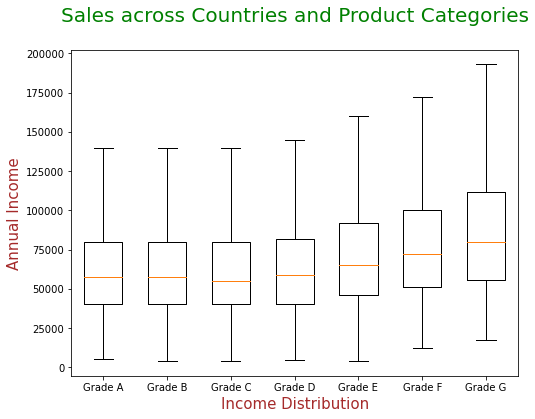

In [221]:
plt.figure(figsize=[8, 6])

# showfliers=False will remove outliers from graph
plt.boxplot([loan_data.loc[loan_data['grade'] == 'A', 'annual_inc'], 
             loan_data.loc[loan_data['grade'] == 'B', 'annual_inc'],
             loan_data.loc[loan_data['grade'] == 'C', 'annual_inc'],
             loan_data.loc[loan_data['grade'] == 'D', 'annual_inc'],
             loan_data.loc[loan_data['grade'] == 'E', 'annual_inc'],
             loan_data.loc[loan_data['grade'] == 'F', 'annual_inc'],
             loan_data.loc[loan_data['grade'] == 'G', 'annual_inc']], 
            showfliers=False, widths=(0.6))

# Adding and formatting title
plt.title("Sales across Countries and Product Categories\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Income Distribution", fontdict={'fontsize': 15, 'fontweight' : 10, 'color' : 'Brown'})
plt.ylabel("Annual Income", fontdict={'fontsize': 15, 'fontweight' : 10, 'color' : 'Brown'})

plt.xticks((1,2,3,4,5,6,7),["Grade A", "Grade B", "Grade C", "Grade D", "Grade E", "Grade F", "Grade G"])

plt.show()

In [222]:
# df_good = loan_data[loan_data['loan_status'] == 'Fully Paid']
# df_bad = loan_data[loan_data['loan_status'] == 'Charged Off']

# grade = loan_data['grade']
# sub_grade = loan_data['sub_grade']
# loan_status = loan_data['loan_status']
# income = loan_data['annual_inc']
# funded_amnt_inv = loan_data['funded_amnt_inv']

## Bar Graph for Grade Relation with loan default

This graph tell about Grade/Annual Income relation with Loan Status

**Analysis:**

**High Annual income individual not neccessorily successfully able to fully pay the loan.**

In below graph we can observe,
- Lower income then **Grade G** borrowers successfully able to fully pay the loan as per **Grade A**

Further analysis require to find exact relation of Grade on Loan default

In [223]:
dfg = loan_data.groupby(by=['grade', 'loan_status']).mean()
dfg = dfg.drop(columns=['id', 'dti', 'installment', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv'])
#dfg


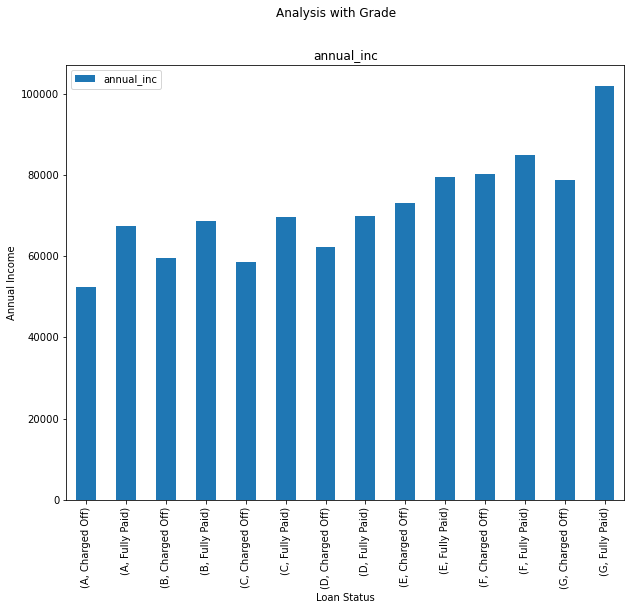

In [224]:
plot = dfg.plot(kind='bar', title='Analysis with Grade', ylabel='Annual Income',
         xlabel='Loan Status', figsize=(10, 8), subplots=True)


In [225]:
# Defining fuction for percentage bar graph drawing
def draw_percentage_bar_chart(X, Y, title_str, xlabel, ylabel):
    chart1 = plt.bar(X, Y, label='Count', width=0.2, color='Red')

    # Adding and formatting title
    plt.title(title_str, fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})

    # Labeling Axes
    plt.xlabel(xlabel, fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
    plt.ylabel(ylabel, fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})

    plt.xticks(rotation=45)

    # Add count number for each bar candle
    plt.bar_label(chart1, fmt='%d %%')

    plt.legend(prop={"size":16})
    plt.show()

## Grade VS Loan status

This graph tell about Grade VS Loan Status relationship

**Analysis:**
- For loan status catogory, grade is showing relation. The higher the grade higher the chances of fully paying the loan amount.

In [226]:
pivot_grade_data = loan_data.loc[:, ['grade', 'loan_status']]
df_pivot_grade = pd.pivot_table(pivot_grade_data, index=['grade'], columns= ['loan_status'], aggfunc= len)

#pivot_data

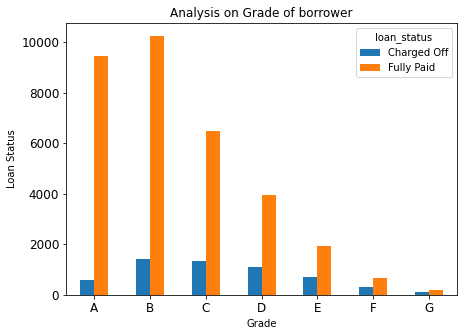

In [227]:
plot = df_pivot_grade.plot(kind='bar', title='Analysis on Grade of borrower', ylabel='Loan Status',
         xlabel='Grade', figsize=(7, 5), fontsize=12, rot=0)

In [228]:
# Find percetage of defaut for each Grade
df_pivot_grade["Ratio Percentage"] = ((df_pivot_grade["Charged Off"] * 100) / df_pivot_grade["Fully Paid"]).round(2)
df_pivot_grade.drop(columns = ["Charged Off", "Fully Paid"], inplace=True)
df_pivot_grade

loan_status,Ratio Percentage
grade,
A,6.38
B,13.90
C,20.76
D,28.18
E,36.70
F,48.55
G,51.01


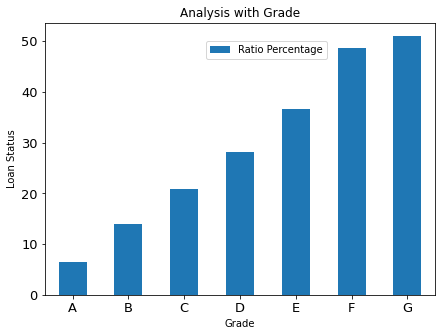

In [229]:
plot = df_pivot_grade.plot(kind='bar', title='Analysis with Grade', ylabel='Loan Status',
         xlabel='Grade', figsize=(7, 5), fontsize=13, rot=0)
plot = plot.legend(loc='center left', bbox_to_anchor=(0.4, 0.9))

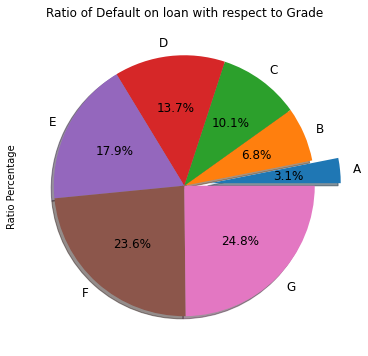

In [230]:
# Ploting Pie chart to analyse Ratio of default with respect to Grade
plot = df_pivot_grade['Ratio Percentage'].plot(kind='pie', title='Ratio of Default on loan with respect to Grade', xlabel='Loan Status', 
        figsize=(8, 6), fontsize=12, rot=0, shadow=True, explode=(0.2, 0,0 ,0,0,0,0), autopct='%1.1f%%')

## Home Ownership VS Loan status

This graph tell about home ownership VS Loan Status relationship

**Analysis:**
- Mortgage ownership have low default in percentage

In [231]:
pivot_home_owner_data = loan_data.loc[:, ['home_ownership', 'loan_status']]

# Drop the index whose home_ownership is NONE as per record
indexNone = pivot_home_owner_data[loan_data['home_ownership'] == 'NONE'].index
pivot_home_owner_data = pivot_home_owner_data.drop(indexNone)
df_pivot_home = pd.pivot_table(pivot_home_owner_data, index=['home_ownership'], columns= ['loan_status'], aggfunc= len)

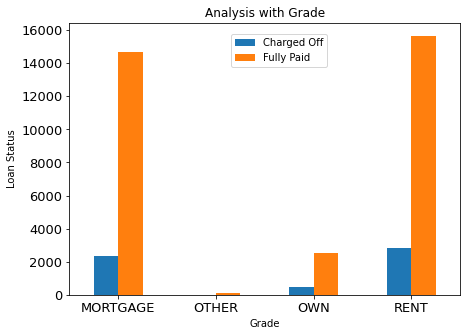

In [232]:
plot = df_pivot_home.plot(kind='bar', title='Analysis with Grade', ylabel='Loan Status',
         xlabel='Grade', figsize=(7, 5), fontsize=13, rot=0)
plot = plot.legend(loc='center left', bbox_to_anchor=(0.4, 0.9))

In [233]:
# Find percetage of defaut for each Grade
df_pivot_home["Ratio Percentage"] = ((df_pivot_home["Charged Off"] * 100 )/ df_pivot_home["Fully Paid"]).round(2)
df_pivot_home.drop(columns = ["Charged Off", "Fully Paid"], inplace=True)
df_pivot_home

loan_status,Ratio Percentage
home_ownership,
MORTGAGE,15.84
OTHER,22.50
OWN,17.50
RENT,18.15


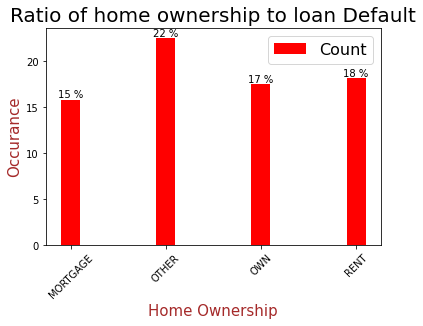

In [234]:
#plot = df_pivot_home['Ratio Percentage'].plot(kind='pie', title='Ratio of Default on loan with respect to Home Ownership', xlabel='Loan Status', 
#        figsize=(8, 6), fontsize=12, rot=0, shadow=True, explode=(0.2, 0,0 ,0), autopct='%1.1f%%')

X = df_pivot_home['Ratio Percentage'].index
Y = df_pivot_home['Ratio Percentage'].values
draw_percentage_bar_chart(X, Y, 'Ratio of home ownership to loan Default', 'Home Ownership', 'Occurance')

## dti relation on loan status

This graph tell about dti VS Loan Status relationship.

dti is debt to income ratio which tells about the expenditure of borrower.

**Analysis:**


In [264]:
# Drop the index whose home_ownership is NONE as per record
indexNone = loan_data[loan_data['home_ownership'] == 'NONE'].index
df_dti_data = loan_data.drop(indexNone)

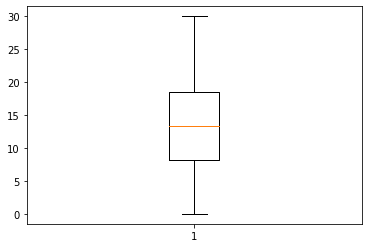

In [265]:
plt.boxplot(df_dti_data['dti'])
plt.show()

In [266]:
Q3 = df_dti_data['dti'].quantile(0.75)
Q1 = df_dti_data['dti'].quantile(0.25)
print(Q3)
print(Q1)

18.56
8.13


In [267]:
df_dti_data.loc[df_dti_data['dti'] >= 18.56, 'dti_bins'] = 'high'
df_dti_data.loc[df_dti_data['dti'] <= 8.13, 'dti_bins'] = 'low'
df_dti_data.loc[(df_dti_data['dti'] > 8.13) & (df_dti_data['dti'] < 18.56), 'dti_bins'] = 'medium'
df_dti_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,int_rate,installment,loan_status,grade,sub_grade,dti,verification_status,term,home_ownership,purpose,addr_state,dti_bins
0,1077501,5000,5000,4975.0,24000.0,10.65%,162.87,Fully Paid,B,B2,27.65,Verified,36 months,RENT,credit_card,AZ,high
1,1077430,2500,2500,2500.0,30000.0,15.27%,59.83,Charged Off,C,C4,1.00,Source Verified,60 months,RENT,car,GA,low
2,1077175,2400,2400,2400.0,12252.0,15.96%,84.33,Fully Paid,C,C5,8.72,Not Verified,36 months,RENT,small_business,IL,medium
3,1076863,10000,10000,10000.0,49200.0,13.49%,339.31,Fully Paid,C,C1,20.00,Source Verified,36 months,RENT,other,CA,high
5,1075269,5000,5000,5000.0,36000.0,7.90%,156.46,Fully Paid,A,A4,11.20,Source Verified,36 months,RENT,wedding,AZ,medium


In [259]:
df_dti_data = df_dti_data.loc[:, ['dti_bins',  'loan_status']]
df_dti_data.head()

,dti_bins,loan_status
0,high,Fully Paid
1,low,Charged Off
2,medium,Fully Paid
3,high,Fully Paid
5,medium,Fully Paid


In [260]:
pivot_dti_data = pd.pivot_table(df_dti_data, index=['dti_bins'], columns= ['loan_status'], aggfunc= len)
pivot_dti_data

loan_status,Charged Off,Fully Paid
dti_bins,,
high,1617,8029
low,1192,8458
medium,2818,16460


In [261]:
#df_home_data.drop(columns = ["Charged Off", "Fully Paid"], inplace=True)

In [262]:
plot = df_dti_data.plot(kind='bar', title='Analysis on Grade of borrower', ylabel='Loan Status',
         xlabel='Grade', figsize=(7, 5), fontsize=12, rot=0)

TypeError: no numeric data to plot

In [263]:
# Find percetage of defaut for each Grade
df_dti_data["Ratio Percentage"] = ((pivot_dti_data["Charged Off"] * 100) / pivot_dti_data["Fully Paid"]).round(2)
df_dti_data.drop(columns = ["Charged Off", "Fully Paid"], inplace=True)
df_dti_data['Ratio Percentage']

KeyError: "['Charged Off', 'Fully Paid'] not found in axis"

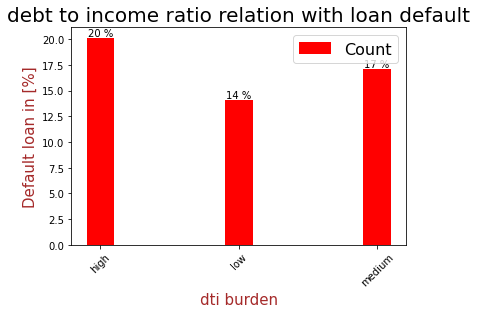

In [244]:
# Draw graph to find out percentage
X = pivot_home_data['Ratio Percentage'].index
Y = pivot_home_data['Ratio Percentage'].values
draw_percentage_bar_chart(X, Y, 'debt to income ratio relation with loan default', 'dti burden', 'Default loan in [%]')


## Relation of loan on Tenure of loan (term)


This graph tell about dti VS Loan Status relationship.

dti is debt to income ratio which tells about the expenditure of borrower.

**Analysis:**
- It is observed that, borrower who have "36 month" tenure are more in count and complete the loan successfully.

In [245]:
df_home_data.head()

,dti_bins,loan_status
0,high,Fully Paid
1,low,Charged Off
2,medium,Fully Paid
3,high,Fully Paid
5,medium,Fully Paid


In [204]:
df_home_data.loc[df_home_data['dti'] >= 18.56, 'dti_bins'] = 'high'
df_home_data.loc[df_home_data['dti'] <= 8.13, 'dti_bins'] = 'low'
df_home_data.loc[(df_home_data['dti'] > 8.13) & (df_home_data['dti'] < 18.56), 'dti_bins'] = 'medium'
df_home_data.head()

df_term_data = df_home_data.loc[:, ['term', 'dti_bins', 'loan_status']]
df_term_data.head()

KeyError: 'dti'

In [184]:
df_term_data = pd.pivot_table(df_term_data, index=['term'], columns= ['loan_status'], aggfunc= len)
df_term_data

loan_status,Charged Off,Fully Paid
term,,
36 months,3227,25869
60 months,2400,7081


In [192]:
df_term_data.groupby([ 'dti_bins']).sum()

KeyError: 'dti_bins'

array([<AxesSubplot:ylabel='Charged Off'>,
       <AxesSubplot:ylabel='Fully Paid'>], dtype=object)

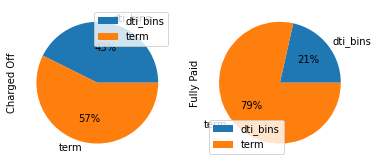

In [188]:
df_term_data.groupby(['term', 'dti_bins']).sum().plot(
    kind='pie', autopct='%1.0f%%', subplots=True)

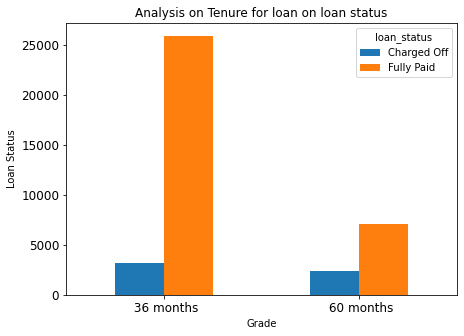

In [185]:
plot = df_term_data.plot(kind='bar', title='Analysis on Tenure for loan on loan status', ylabel='Loan Status',
         xlabel='Grade', figsize=(7, 5), fontsize=12, rot=0)

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Annual Income')

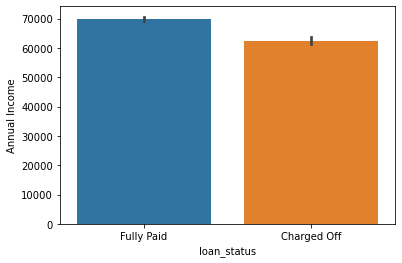

In [189]:
# barplot_chart = sns.barplot(np.array(loan_status), np.array(income), x="X axis", y= "Y axis")
# barplot_chart.set_xlabel("loan_status")
# barplot_chart.set_ylabel("Annual Income")

In [ ]:
fig, ax = plt.subplots(ncols=2, sharey=True)

income_chart = ax[0].bar(loan_status, income, label='1')
income_chart.set_label("Income")
ax[0].set_title('Income vs Loan status')

income_chart = ax[1].bar(loan_status, income, label='2')
income_chart.set_label("Income")
ax[1].set_title('Income vs Loan status')

#ax[1].bar(loan_status, funded_amnt_inv, label='2')

# ax[1].scatter(loan_data['funded_amnt'], loan_data['annual_inc'],  alpha= 0.6, s = 50 )
fig.set_size_inches(20.5, 5.5, forward=True)
plt.show()


Text(0, 0.5, 'Sales')

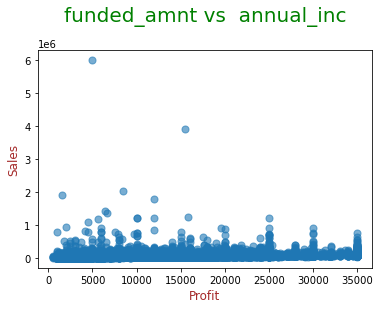

In [195]:
# plotting scatter chart
plt.scatter(loan_data['funded_amnt'], loan_data['annual_inc'],  alpha= 0.6, s = 50 )
#plt.scatter(loan_data['funded_amnt_inv'], loan_data['annual_inc'],  alpha= 0.6, s = 50 )

# Adding and formatting title
plt.title("funded_amnt vs  annual_inc\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Profit", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Sales", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})